# Regression

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling di sini


reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))

print('coefficient')
print(reg.coef_)
print('intercept')
print(reg.intercept_)

print('prediction')
y_pred = reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])


coef of determination training  0.6995155846436758
coef of determination testing  0.6994627057969931
coefficient
[-3.43081477e+04  4.03129700e+04  1.12001375e+02  9.91841247e-02
  5.27154218e+03  5.43877177e+05  5.50830616e+04  2.31460673e+04
  9.49081794e+04  7.22190668e+01  3.97823082e+01 -2.59441847e+03
  2.19209734e+01 -5.56358731e+02  5.95216324e+05 -1.96904658e+05
  1.62077488e+01 -3.30430480e-01]
intercept
6641646.708106328
prediction
[ 458597.06764156  748993.75994812 1243303.7579907  1665116.95095485
  737302.05741749  283239.58524965  831732.87582315  495383.02095345
  385779.81919032  474179.42285123]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import scipy.stats

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
r = scipy.stats.pearsonr(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)
print('r :', r[0])

rmse :  208296.72772118772
r2 : 0.6994627057969931
r : 0.8365420533514896


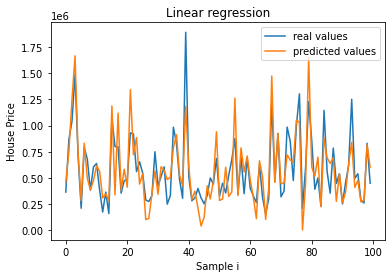

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Linear regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))

print('coefficient')
print(las.coef_)
print('intercept')
print(las.intercept_)

print('prediction')
y_pred = las.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.6995155840368914
coef of determination testing  0.6994610128651573
coefficient
[-3.43076850e+04  4.03114120e+04  2.84911657e+02  9.91632259e-02
  5.27123079e+03  5.43797338e+05  5.50856199e+04  2.31442635e+04
  9.49094340e+04 -1.00690981e+02 -1.33125080e+02 -2.59448802e+03
  2.19215887e+01 -5.56289851e+02  5.95183981e+05 -1.96858621e+05
  1.62061133e+01 -3.30453373e-01]
intercept
6642194.014812021
prediction
[ 458599.02700705  748987.81240725 1243307.2686813  1665112.63804505
  737301.38730388  283243.81761958  831725.9107284   495376.3539486
  385782.22242161  474176.56791352]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+14, tolerance: 1.977e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  208297.31438991716
r2 : 0.6994610128651573


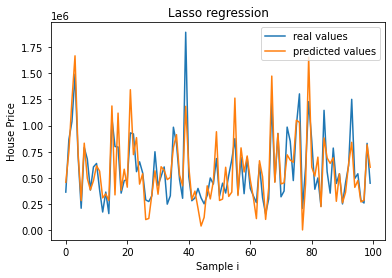

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ri = Lasso(alpha=0.9)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))

print('coefficient')
print(ri.coef_)
print('intercept')
print(ri.intercept_)

print('prediction')
y_pred = ri.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.6995155826776935
coef of determination testing  0.6994596576369887
coefficient
[-3.43073148e+04  4.03101657e+04  2.84911706e+02  9.91465069e-02
  5.27098168e+03  5.43733467e+05  5.50876665e+04  2.31428204e+04
  9.49104377e+04 -1.00690842e+02 -1.33122813e+02 -2.59454365e+03
  2.19220809e+01 -5.56234746e+02  5.95158107e+05 -1.96821791e+05
  1.62048049e+01 -3.30471688e-01]
intercept
6642631.86018117
prediction
[ 458600.59449927  748983.05437433 1243310.07723367 1665109.18771725
  737300.85121291  283247.20351533  831720.33865245  495371.02034458
  385784.14500657  474174.28396314]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+14, tolerance: 1.977e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  208297.7840296008
r2 : 0.6994596576369887


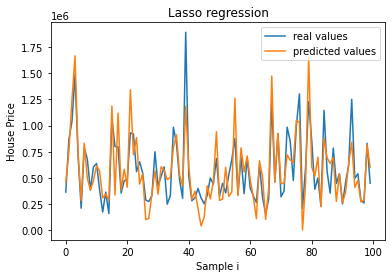

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))

print('prediction')
y_pred = dt.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.9185274272472612
coef of determination testing  0.7485721674236946
prediction
[ 372512.5         837693.06862745 1087247.96153846 1984617.64705882
  656314.08658009  237079.87179487  849106.21276596  517991.26363636
  366270.875       519039.40166667]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  190519.72112030193
r2 : 0.7485721674236946


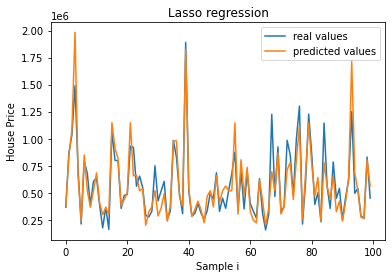

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ', rf.score(X_train, y_train))
print('coef of determination testing ', rf.score(X_test, y_test))

print('prediction')
y_pred = rf.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.9825972919209108
coef of determination testing  0.8597073350963493
prediction
[ 374950.5         839661.4        1122819.53333333 1994848.
  707346.71        248120.78        854536.69        611068.37
  400970.77        558845.4       ]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]
